In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing
import tensorflow as tf
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, classification_report


### Read the data from github repository and drop uniqe values from it, also combining colunms which are related each other

In [2]:
url = 'https://raw.githubusercontent.com/AtesBurak1/Ceng-474-Final/main/smoking.csv'
df = pd.read_csv(url)
pd.set_option('display.max_columns', None)
##missing_count = df.isna().sum()  0
##print(missing_count)   0

#No need id because it is unique to everyone
df = df.sort_values(by = 'ID')
df = df.drop(['ID'], axis = 1)
## No need for oral column since every value is 1
df = df.drop(['oral'], axis = 1)

## Encode
label_encoder = preprocessing.LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['tartar'] = label_encoder.fit_transform(df['tartar'])

### Fix the blind values for eyesight, then combine eyesight

In [3]:
## Combine left and right eyesight and hearing
columns_to_replace = ['eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)']
df[columns_to_replace] = df[columns_to_replace].replace(9.9, 0)

df['eyesight'] = df[['eyesight(left)', 'eyesight(right)']].mean(axis=1)
df['hearing'] = df[['hearing(left)', 'hearing(right)']].mean(axis=1)
df = df.drop(['eyesight(left)', 'eyesight(right)','hearing(left)', 'hearing(right)'],axis = 1)

In [4]:
#Describe data to look is there any outlayer values
df.describe()

,gender,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking,eyesight,hearing
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,0.635657,44.182917,164.649321,65.864936,82.046418,121.494218,76.004830,99.312325,196.901422,126.665697,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.555556,0.367288,0.993679,1.025865
std,0.481250,12.071418,9.194597,12.820306,9.274223,13.675989,9.679278,20.795591,36.297940,71.639817,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.496908,0.482070,0.301393,0.137929
min,0.000000,20.000000,130.000000,30.000000,51.000000,71.000000,40.000000,46.000000,55.000000,8.000000,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,40.000000,160.000000,55.000000,76.000000,112.000000,70.000000,89.000000,172.000000,74.000000,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000,0.000000,0.800000,1.000000
50%,1.000000,40.000000,165.000000,65.000000,82.000000,120.000000,76.000000,96.000000,195.000000,108.000000,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,55.000000,170.000000,75.000000,88.000000,130.000000,82.000000,104.000000,220.000000,160.000000,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000,1.000000,1.200000,1.000000
max,1.000000,85.000000,190.000000,135.000000,129.000000,240.000000,146.000000,505.000000,445.000000,999.000000,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000,1.000000,2.000000,2.000000


### Pieplot

<Axes: ylabel='count'>

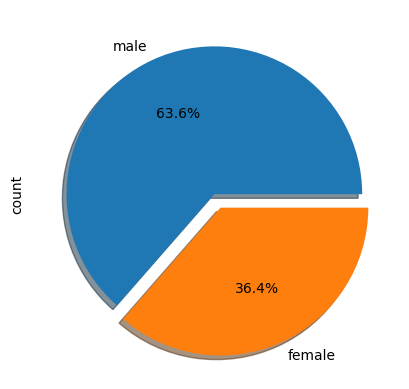

In [5]:
# The pie plot refenced from here -> https://www.kaggle.com/code/abdalrahmanshahrour/predict-smoking-status-accuracy-99-2-93-6
df['gender'].value_counts().plot.pie(explode = [0,0.1], autopct="%1.1f%%",labels=["male","female"], shadow=True)


<Axes: ylabel='count'>

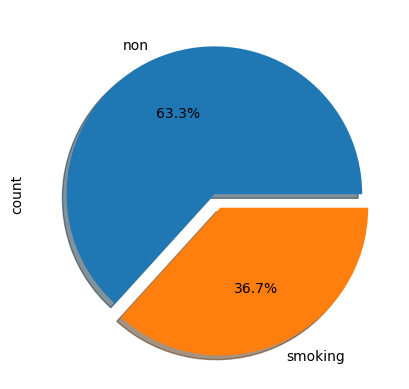

In [6]:

df['smoking'].value_counts().plot.pie(explode = [0,0.1], autopct="%1.1f%%",labels=["non","smoking"], shadow=True)

## CatPlot

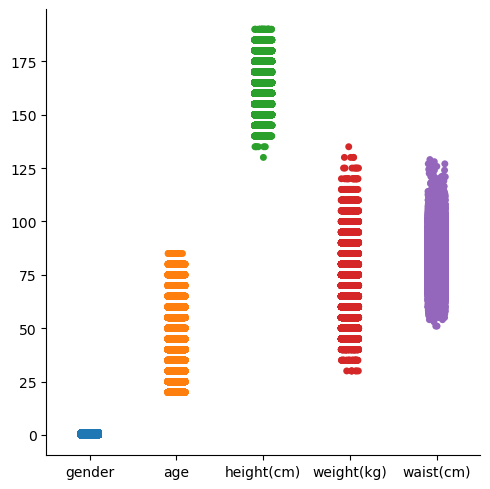

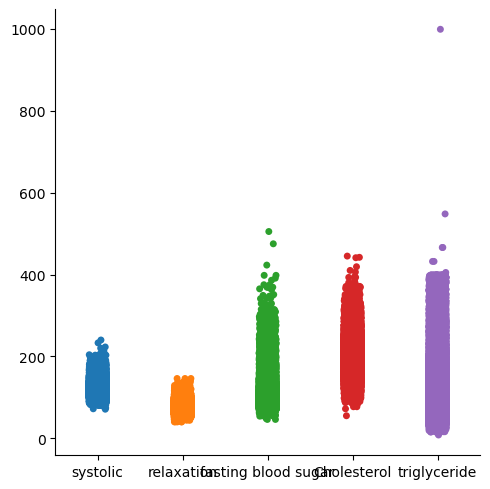

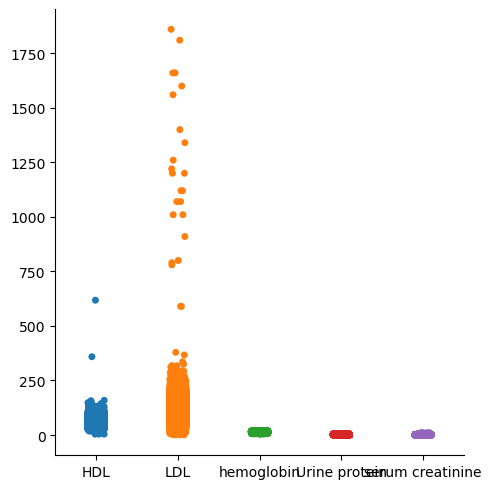

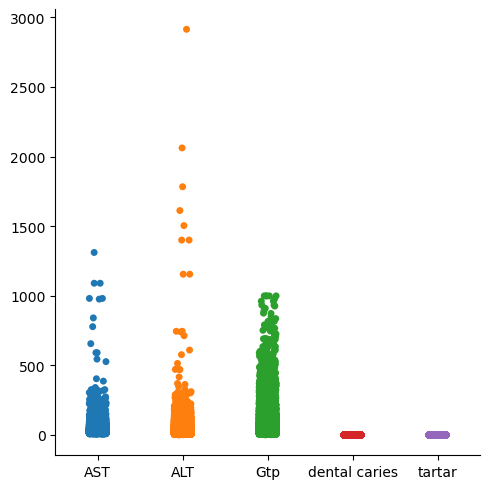

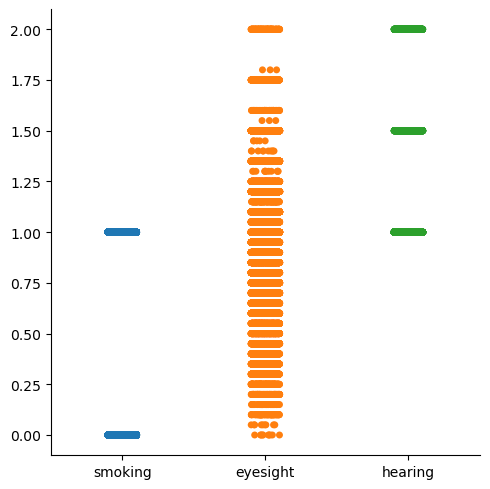

In [7]:
#CatPlots
sns.catplot(df.iloc[:, 0:5])
sns.catplot(df.iloc[:, 5:10])
sns.catplot(df.iloc[:, 10:15])
sns.catplot(df.iloc[:, 15:20])
sns.catplot(df.iloc[:, 20:23])

## BoxPlot

<Axes: xlabel='gender'>

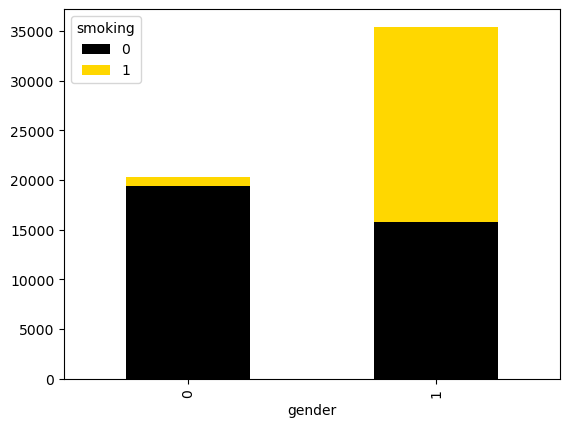

In [8]:
#BoxPlot
smoker_counts = pd.crosstab(index=[df['gender']], columns=df['smoking'], margins=True)

smoker_counts.iloc[:-1, :-1].plot(kind='bar', stacked=True, color=['black', 'gold'], grid=False, )


## HeatMap

<Axes: >

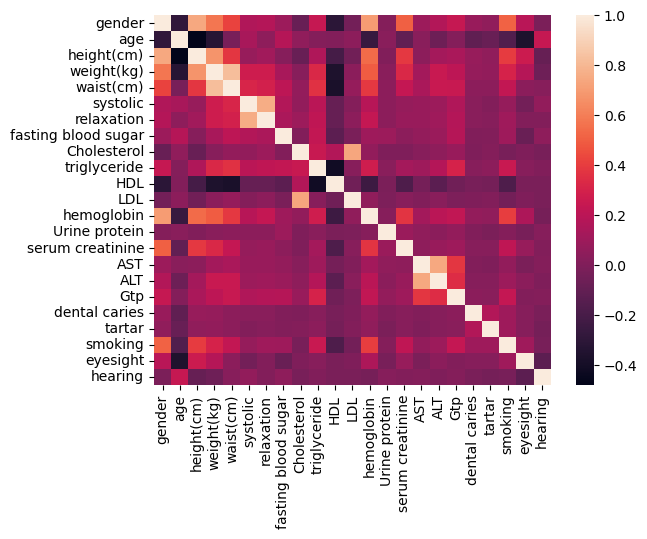

In [9]:
#HeatMap
corelation=df.corr()
sns.heatmap(corelation)

#Get rid of outlayer

In [10]:
# Make max values like this beacuse of outlayers still exist and we cant delete all of them, there could be too much data loss  got the values from https://www.kaggle.com/code/m000sey/ps-3-24-boosting-ensemble-w-nn
#df['Gtp'] = np.clip(df['Gtp'], 0, 300)
#df['LDL'] = np.clip(df['LDL'], 0, 250)
#df['ALT'] = np.clip(df['ALT'], 0, 150)
#df['AST'] = np.clip(df['AST'], 0, 100)
#df['serum creatinine'] = np.clip(df['serum creatinine'], 0, 2)
#df['fasting blood sugar'] = np.clip(df['fasting blood sugar'], 0, 175)
#df['triglyceride'] = np.clip(df['triglyceride'], 0, 400)
#df['hemoglobin'] = np.clip(df['hemoglobin'], 8, 20)

In [21]:
# using the Interquartile Range (IQR) method

num_columns = df.shape[0]
print("Sample size before iqr:", num_columns)

quantile1, quantile3 = np.percentile(df, [25, 75],axis=0)
iqr_value = quantile3 - quantile1
lower_bound_val = quantile1 - (5 * iqr_value)
upper_bound_val = quantile3 + (5 * iqr_value)

outliers_mask = (df < lower_bound_val) | (df > upper_bound_val)

new_df = df[~outliers_mask.any(axis=1)]

num_columns = new_df.shape[0]
print("Sample size after iqr", num_columns)
# ss 33073 when using 2* iqr_value
# ss 36000 3*
# ss 37564 4*
# ss 38215 5*

Sample size before iqr: 55692
Sample size after iqr 38215


In [12]:
Y = new_df['smoking']
X = new_df.drop(['smoking'], axis=1)
scaler = StandardScaler()
X_standard = pd.DataFrame(scaler.fit_transform(X))
scaler2 = MinMaxScaler()
X_min_max = pd.DataFrame(scaler2.fit_transform(X))


In [13]:
X_standard.describe() #Now we have more stable values

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
count,3.821500e+04,3.821500e+04,3.821500e+04,3.821500e+04,3.821500e+04,3.821500e+04,3.821500e+04,3.821500e+04,3.821500e+04,3.821500e+04,3.821500e+04,3.821500e+04,3.821500e+04,38215.0,3.821500e+04,3.821500e+04,3.821500e+04,3.821500e+04,38215.0,3.821500e+04,3.821500e+04,38215.0
mean,-6.656399e-17,-2.207024e-16,-3.127392e-16,-4.458672e-16,7.511691e-17,3.237093e-16,2.805728e-16,2.253507e-16,-1.134191e-16,2.045262e-17,7.641844e-17,-5.931261e-17,-3.822781e-16,0.0,-3.607099e-17,-8.162456e-17,1.058888e-16,-1.127683e-16,0.0,3.123673e-17,3.824641e-16,0.0
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,0.0,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,0.0,1.000013e+00,1.000013e+00,0.0
min,-1.235223e+00,-2.074331e+00,-3.729170e+00,-2.815137e+00,-3.356921e+00,-3.658998e+00,-3.744470e+00,-3.622343e+00,-3.345625e+00,-1.661714e+00,-3.722603e+00,-3.443629e+00,-6.172508e+00,0.0,-4.106951e+00,-2.235746e+00,-1.616208e+00,-1.152209e+00,0.0,-1.031235e+00,-3.365906e+00,0.0
25%,-1.235223e+00,-3.626399e-01,-1.013086e+00,-8.150986e-01,-7.132188e-01,-7.360730e-01,-5.876719e-01,-5.826715e-01,-6.967250e-01,-7.212651e-01,-7.409551e-01,-6.922512e-01,-6.636168e-01,0.0,-9.381584e-01,-6.533117e-01,-6.487081e-01,-6.526910e-01,0.0,-1.031235e+00,-6.730719e-01,0.0
50%,8.095702e-01,-3.626399e-01,7.334813e-02,-1.508337e-02,-5.229323e-02,-6.155188e-02,4.368769e-02,-1.585314e-01,-5.541244e-02,-2.582748e-01,-1.168893e-01,-5.731779e-02,1.050657e-01,0.0,1.181059e-01,-1.664089e-01,-3.031725e-01,-3.452953e-01,0.0,9.697114e-01,1.365266e-04,0.0
75%,8.095702e-01,9.211288e-01,6.165650e-01,7.849318e-01,6.526941e-01,6.879161e-01,5.698207e-01,4.069888e-01,6.137833e-01,4.651476e-01,5.765171e-01,6.380855e-01,7.456344e-01,0.0,6.462381e-01,4.422196e-01,3.187915e-01,2.310716e-01,0.0,9.697114e-01,6.733450e-01,0.0
max,8.095702e-01,3.488666e+00,2.789432e+00,5.585023e+00,5.235112e+00,6.908500e+00,6.462510e+00,5.779431e+00,6.803844e+00,6.151248e+00,6.886515e+00,6.685070e+00,3.756307e+00,0.0,5.399427e+00,5.919876e+00,5.985575e+00,5.379950e+00,0.0,9.697114e-01,3.366179e+00,0.0


### Scaled CatPlot


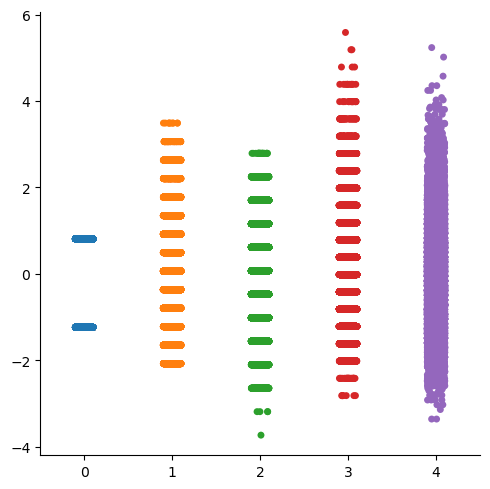

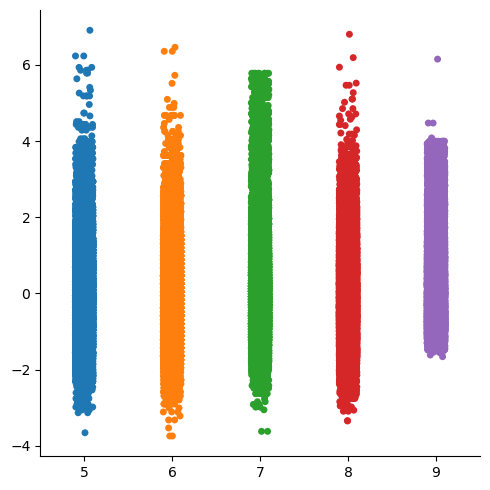

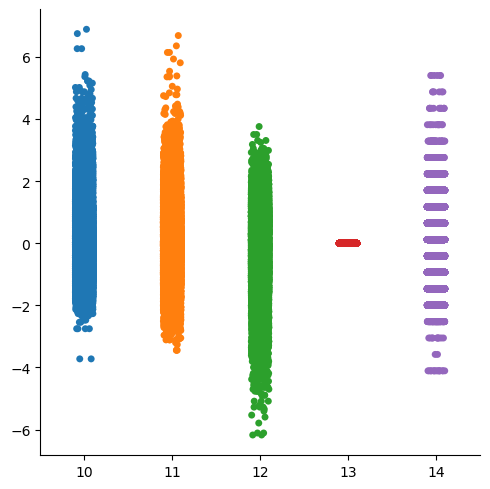

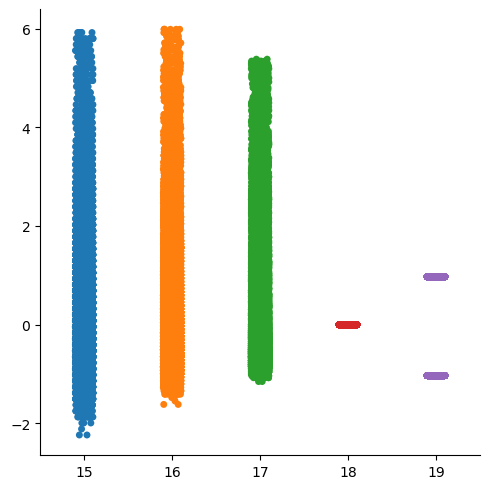

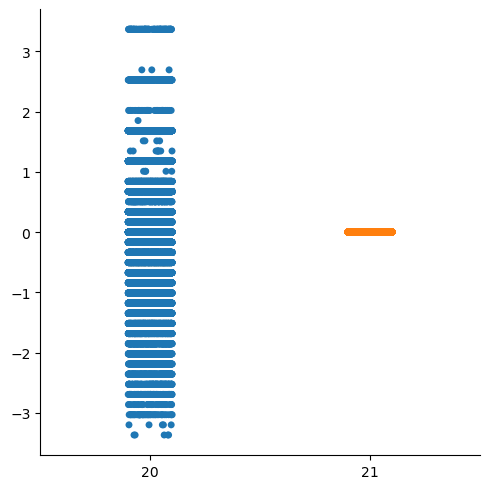

In [14]:
#CatPlot
#CatPlots
sns.catplot(X_standard.iloc[:, 0:5])
sns.catplot(X_standard.iloc[:, 5:10])
sns.catplot(X_standard.iloc[:, 10:15])
sns.catplot(X_standard.iloc[:, 15:20])
sns.catplot(X_standard.iloc[:, 20:22])

### Scaled BoxPlot


<Axes: xlabel='gender'>

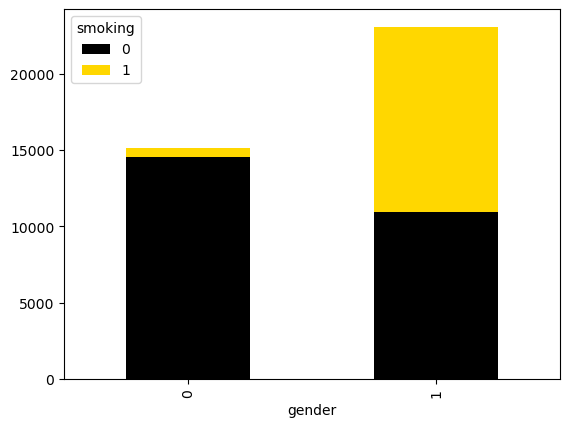

In [15]:
#BoxPlot
smoker_counts = pd.crosstab(index=[new_df['gender']], columns=new_df['smoking'], margins=True)

smoker_counts.iloc[:-1, :-1].plot(kind='bar', stacked=True, color=['black', 'gold'], grid=False, )

### Scaled HeatMap

<Axes: >

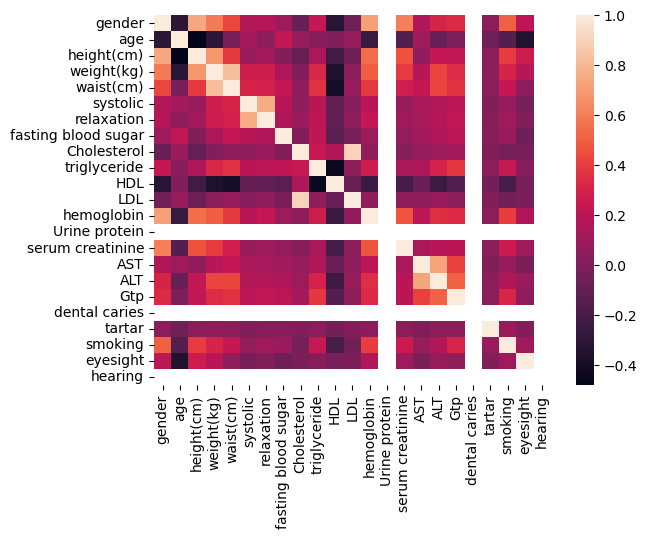

In [16]:
#HeatMap
corelation=new_df.corr()
sns.heatmap(corelation)

<Axes: ylabel='count'>

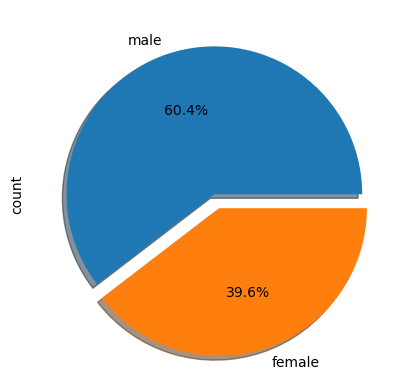

In [17]:
new_df['gender'].value_counts().plot.pie(explode = [0,0.1], autopct="%1.1f%%",labels=["male","female"], shadow=True)


<Axes: ylabel='count'>

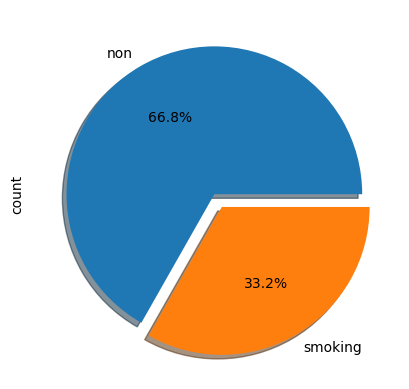

In [18]:

new_df['smoking'].value_counts().plot.pie(explode = [0,0.1], autopct="%1.1f%%",labels=["non","smoking"], shadow=True)

# FEATURE SELECTION

### Lasso

In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score


# Lets find how many features are needed using a loop and 5 different feature selection method
feature_count = 12 # will go to 8
RFC = RandomForestClassifier(n_estimators=50)
model_list = {
    'Logistic': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'chi2': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'Lasso': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'mutual': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'PCA': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'RFC': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'KNN': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'Stacking': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'Max_voting': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'Deep_learning': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0}
}

for key in model_list:
    model_list[key]['accuracy'] = 0
#Only lasso is applied once
lasso = Lasso(alpha=0.0001)
lasso.fit(X_standard, Y)

# Get feature which does not have coeffient 0
selected_features = X_standard.columns[lasso.coef_ != 0]
X_lasso = X_standard[selected_features]
X_train_lasso, X_test_lasso, y_train_lasoo, y_test_lasso = train_test_split(X_lasso, Y, test_size=0.2, random_state=42)
RFC.fit(X_train_lasso, y_train_lasoo)


y_pred_lasso = RFC.predict(X_test_lasso)


precision = precision_score(y_test_lasso, y_pred_lasso)
recall = recall_score(y_test_lasso, y_pred_lasso)
f1 = f1_score(y_test_lasso, y_pred_lasso)

roc_auc = roc_auc_score(y_test_lasso, y_pred_lasso)
accuracy = accuracy_score(y_test_lasso, y_pred_lasso)

# Assign these values to the model dictionary
model_list['Lasso']['precision'] = precision
model_list['Lasso']['recall'] = recall
model_list['Lasso']['f1_score'] = f1
model_list['Lasso']['feature_count'] = X_lasso.shape[1]
model_list['Lasso']['roc_auc'] = roc_auc
model_list['Lasso']['accuracy'] = accuracy

NameError: name 'train_test_split' is not defined

In [ ]:
model_list['Lasso']['accuracy']

### Chi2 and mutual_info with SelectKBest

In [ ]:
def RFC_train_test_SelectKBest(method, feature_count, X, Y):
    k_best = SelectKBest(score_func=method, k=feature_count)
    X_selected = k_best.fit_transform(X, Y)
    X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

    RFC.fit(X_train, y_train)
    y_pred = RFC.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    return f1, precision, recall, roc_auc,accuracy


feature_count = 21
while feature_count > 15:
    chi_f1, chi_precision, chi_recall, chi_roc_auc, chi_acc = RFC_train_test_SelectKBest(chi2, feature_count, X_min_max, Y)
    mutual_f1, mutual_precision, mutual_recall, mutual_roc_auc, mutual_acc = RFC_train_test_SelectKBest(mutual_info_classif, feature_count, X, Y)

    if chi_acc > model_list['chi2']['accuracy']:
        model_list['chi2']['f1'] = chi_f1
        model_list['chi2']['precision'] = chi_precision
        model_list['chi2']['recall'] = chi_recall
        model_list['chi2']['feature_count'] = feature_count
        model_list['chi2']['roc_auc'] = chi_roc_auc
        model_list['chi2']['accuracy'] = chi_acc

    if mutual_acc > model_list['mutual']['accuracy']:
        model_list['mutual']['f1'] = mutual_f1
        model_list['mutual']['precision'] = mutual_precision
        model_list['mutual']['recall'] = mutual_recall
        model_list['mutual']['feature_count'] = feature_count
        model_list['mutual']['roc_auc'] = mutual_roc_auc
        model_list['mutual']['accuracy'] = mutual_acc
    feature_count -= 1


### PCA


In [ ]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
#PCA
# Apply PCA
# chi2 gives best performance at feature numberr 16 so we will use 16 feature end of the code from herek_best = SelectKBest(score_func=method, k=feature_count)
k_best = SelectKBest(score_func=chi2, k=17)
X_PCA = k_best.fit_transform(X_min_max, Y)



# Initialize SVM classifier
pipe = make_pipeline(PCA(n_components=5), RFC)

# Specify the number of folds for K-fold cross-validation
k_folds = 5

# Create a KFold object
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform K-fold cross-validatio
accuracy_scores=[]
for train_index, test_index in kf.split(X_PCA):
    
    X_train, X_test = X_PCA[train_index], X_PCA[test_index]
    y_train, y_test = Y.to_numpy()[train_index], Y.to_numpy()[test_index]
    
    # Train the model on the training fold
    pipe.fit(X_train, y_train)
    
    # Predict on the validation fold
    predictions = pipe.predict(X_test)
    
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)


    if accuracy >= model_list['PCA']['accuracy']:
        model_list['PCA']['precision'] = precision
        model_list['PCA']['recall'] = recall
        model_list['PCA']['f1_score'] = f1
        model_list['PCA']['feature_count'] = 5
        model_list['PCA']['roc_auc'] = roc_auc
        model_list['PCA']['accuracy'] = accuracy


### RFC

In [ ]:

def RFC_train_test_RFC(X, Y, feature_count):
    RFC.fit(X, Y)

    # Access feature importances
    feature_importances = RFC.feature_importances_

    # Sort the features
    sorted_feature_indices = feature_importances.argsort()[::-1]

    selected_feature_indices = sorted_feature_indices[:feature_count]

    # Select specified features within cuDF
    X_selected = X_standard.iloc[:, selected_feature_indices]

    X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)
    RFC.fit(X_train, y_train)
    y_pred = RFC.predict(X_test)

    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    return f1, precision, recall, roc_auc, accuracy

feature_count = 15
while feature_count < 20:
    RFC_f1, RFC_precision, RFC_recall, RFC_roc_auc, RFC_accuracy = RFC_train_test_RFC(X_standard, Y, feature_count)
    if RFC_accuracy > model_list['RFC']['accuracy']:
        model_list['RFC']['f1'] = RFC_f1
        model_list['RFC']['precision'] = RFC_precision
        model_list['RFC']['recall'] = RFC_recall
        model_list['RFC']['feature_count'] = feature_count
        model_list['RFC']['roc_auc'] = RFC_roc_auc
        model_list['RFC']['accuracy'] = RFC_accuracy
    feature_count += 1


In [ ]:
def logistic_chi(method, feature_count, X, Y, LR):
    k_best = SelectKBest(score_func=method, k=feature_count)
    X_selected = k_best.fit_transform(X, Y)
    X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

    LR.fit(X_train, y_train)
    y_pred = LR.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    return f1, precision, recall, roc_auc,accuracy

### Logisctic Reggression

In [ ]:
#Logistic Regression Here
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X_standard, Y, test_size=0.2, random_state=42)
Logistic_model = LogisticRegression(random_state=42,max_iter=10000)



feature_count = 21
while feature_count > 15:
    lr_f1, lr_precision, lr_recall, lr_roc_auc, lr_accuracy = logistic_chi(chi2, feature_count, X_min_max, Y,Logistic_model)
    if lr_accuracy > model_list['Logistic']['accuracy']:
        model_list['Logistic']['f1'] = lr_f1
        model_list['Logistic']['precision'] = lr_precision
        model_list['Logistic']['recall'] = lr_recall
        model_list['Logistic']['feature_count'] = feature_count
        model_list['Logistic']['roc_auc'] = lr_roc_auc
        model_list['Logistic']['accuracy'] = lr_accuracy
    feature_count -= 1

# Display the results
print(f'Accuracy: {lr_accuracy}')

In [ ]:
# chi2 gives best performance at feature numberr 17 so we will use 16 feature end of the code from herek_best = SelectKBest(score_func=method, k=feature_count)
k_best = SelectKBest(score_func=chi2, k=17)
X_standard = k_best.fit_transform(X_min_max, Y)

### KNN


In [ ]:
#KNN here  
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_standard, Y, test_size=0.2, random_state=42)    
accuracy_knn = []
for i in range(5,25):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  accuracy_knn.append(accuracy_score(y_test, pred_i))


  f1 = f1_score(y_test, pred_i)
  precision = precision_score(y_test, pred_i)
  recall = recall_score(y_test, pred_i)
  roc_auc = roc_auc_score(y_test, pred_i)
  accuracy = accuracy_score(y_test, pred_i)


  if accuracy >= model_list['KNN']['accuracy']:
      model_list['KNN']['precision'] = precision
      model_list['KNN']['recall'] = recall
      model_list['KNN']['f1_score'] = f1
      model_list['KNN']['feature_count'] = 16
      model_list['KNN']['roc_auc'] = roc_auc
      model_list['KNN']['accuracy'] = accuracy
      

#Bad result beacuse of imbalanced data here!

### Max voting

In [ ]:
#Max voting here
from sklearn.ensemble import VotingClassifier

DTC = DecisionTreeClassifier()
GBC = GradientBoostingClassifier()
LR = LogisticRegression(max_iter=1000)
NB = GaussianNB()
KNN = KNeighborsClassifier(n_neighbors=13)

final_model = VotingClassifier( estimators=[ ('dt', DTC ), ('rf', RFC), ('lr', LR), ('gb', GBC),('NB', NB), ('KNN', KNN) ])
 
# training all the model on the train dataset
x_train, x_test, y_train, y_test = train_test_split(X_standard, Y, test_size=0.2, random_state=42)
final_model.fit(x_train, y_train)
 
# predicting the output on the test dataset
pred_final = final_model.predict(x_test)
 
f1 = f1_score(y_test, pred_final)
precision = precision_score(y_test, pred_final)
recall = recall_score(y_test, pred_final)
roc_auc = roc_auc_score(y_test, pred_final)
accuracy = accuracy_score(y_test, pred_final)


model_list['Max_voting']['precision'] = precision
model_list['Max_voting']['recall'] = recall
model_list['Max_voting']['f1_score'] = f1
model_list['Max_voting']['feature_count'] = 16
model_list['Max_voting']['roc_auc'] = roc_auc
model_list['Max_voting']['accuracy'] = accuracy
print(accuracy)


### Stacking

In [ ]:

## Using SMOTE ENN
from imblearn.combine import SMOTEENN

# Initialize the SMOTEENN object
smoteenn = SMOTEENN(sampling_strategy='auto', random_state=42)

# Apply SMOTEENN to the training data
X_resampled, y_resampled = smoteenn.fit_resample(X_train, y_train)

#Stacking Here
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
base_models = [
    ('logistic', LogisticRegression(max_iter=500)),
    ('random_forest', RandomForestClassifier(n_estimators=75)),
    ('gradient_boosting', GradientBoostingClassifier(n_estimators=75)),
    ('knn', KNeighborsClassifier(n_neighbors=13)),
    ('Extra', ExtraTreesClassifier(n_estimators=75)),
    ('SVM', SVC(kernel='linear', C=1.0, cache_size=1000)), 
    ('adaboost', AdaBoostClassifier(n_estimators=70))  
]

stacked_model = StackingClassifier(estimators = base_models, final_estimator=RandomForestClassifier())
x_train, x_test, y_train, y_test = train_test_split(X_standard, Y, test_size=0.2, random_state=42)
##
smoteenn = SMOTEENN(sampling_strategy=0.7 , random_state=42)
# Apply SMOTEENN only to the training data
X_resampled, y_resampled = smoteenn.fit_resample(x_train, y_train)
##

# Train the stacking model
stacked_model.fit(X_resampled, y_resampled) ## replaced here with resampled smoteen data before smoteen

# Make predictions
stacked_predictions = stacked_model.predict(x_test)

f1 = f1_score(y_test, stacked_predictions)
precision = precision_score(y_test, stacked_predictions)
recall = recall_score(y_test, stacked_predictions)
roc_auc = roc_auc_score(y_test, stacked_predictions)
accuracy = accuracy_score(y_test, stacked_predictions)


model_list['Stacking']['precision'] = precision
model_list['Stacking']['recall'] = recall
model_list['Stacking']['f1_score'] = f1
model_list['Stacking']['feature_count'] = 16
model_list['Stacking']['roc_auc'] = roc_auc
model_list['Stacking']['accuracy'] = accuracy
print(accuracy)

### Deep Learning

In [ ]:
#Deep Learning Here

In [ ]:
best_method = None
best_acc = 0

for method, info in model_list.items():
    acc = info['accuracy']
    if acc > best_acc:
        best_method = method
        best_acc = acc
    print(f"{method} has accuracy={info['accuracy']:.4f} roc_auc={info['roc_auc']:.4f}, f1={info['f1']:.4f}, precision={info['precision']:.4f}, recall={info['recall']:.4f}, feature_count={info['feature_count']}")

print(f"The best feature selection method is '{best_method}' with an accuracy of {best_acc:.4f} and feature count {model_list[best_method]['feature_count']}")